In [ ]:
import librosa
import librosa.display
import os
import pandas as pd

def visualization_logmel(csv_path, start_time, end_time):
    audio_df = pd.read_csv(csv_path)
    df_filtered = audio_df[(audio_df['Time'] >= start_time) & (audio_df['Time'] <= end_time)]

    # 오디오 데이터 column만 선택
    audio_columns = [col for col in audio_df.columns if col.startswith('AudioData')]
    audio_data = df_filtered[audio_columns].values.flatten()  # 1D array로 변환
    audio_data = audio_data.astype('float32')
    
    # 오디오 샘플링레이트
    sr = 16000

    # 64-bin Mel spectrogram 생성
    mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=64)

    # 로그 스케일로 변환
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    # 시각화
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spec, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('64-bin Log-Mel Spectrogram')
    plt.tight_layout()
    plt.show()

# 파일 경로 (Comparison_Data 안에 비교하고자 하는 두 오디오 csv를 넣기)
base_folder = '../Data/Comparison_Data'
csv_files = [f for f in os.listdir(base_folder) if f.endswith('AudioData.csv')]
csv_paths = [os.path.join(base_folder, f) for f in csv_files]

for csv_path in csv_paths:
    visualization_logmel(csv_path, start_time=10, end_time=30)

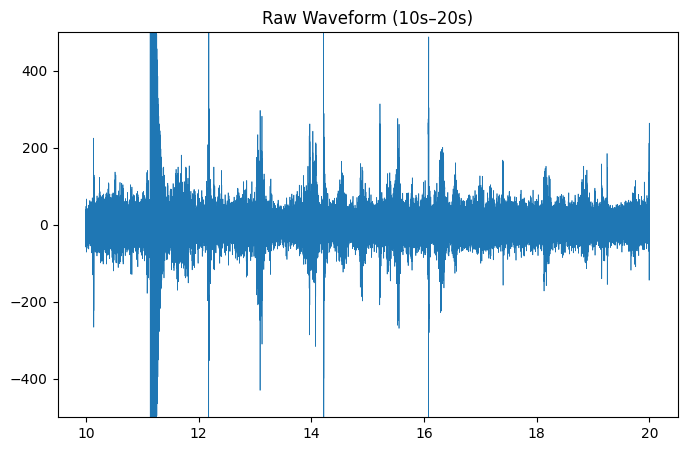

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# WAV 파일 읽기
wav_path = '../Data/Train_Data/1_RawDataset/10/Right/10_Brushing_2025_1_1_14_38_33_AudioData.wav'
samplerate, audio = wavfile.read(wav_path)

# 10초~20초 구간 선택
start_sec, end_sec = 10, 20
start_sample = int(start_sec * samplerate)
end_sample   = int(end_sec   * samplerate)
segment = audio[start_sample:end_sample]

# 시간 축 생성 (초)
times = np.arange(segment.shape[0]) / samplerate + start_sec

# raw 파형 시각화 (y축 제한 적용)
plt.figure(figsize=(8, 5))
plt.plot(times, segment, linewidth=0.5)
plt.title("Raw Waveform (10s–20s)")

# y축 범위 고정: 예) –30000 ~ +30000
plt.ylim(-500, 500)
plt.show()